In [1]:
# Copied over
import read_data
import numpy as np
from matplotlib import pyplot as plt
import copy

from scipy.cluster.vq import vq, kmeans, whiten
import execute as exe

In [2]:
# Copied over
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()

allbases = np.delete(np.array(allbases), 2, 1) # Array of all the bases
demands = np.delete(np.array(demands), 2, 1)   # Array of all the demands
times = np.array(times)                        # Array of all the times
calls_latlong = np.array(calls_latlong)        # Array of location of the calls

In [3]:
# Generate random set of bases.

times_copy = copy.deepcopy(times)
choose = 1
count = 0
iters = 0

print(times) 
print("\n\n")
min_row = np.min(times_copy, axis=0)
print(min_row)
for row in times:

    for x in range(np.shape(min_row)[0]):
        if row[x] == min_row[x]:
            print("Found a common element at position %d" %x)




[[ 1709.  1583.  1851. ...,   294.  1349.   984.]
 [ 1801.  1676.  1944. ...,   292.  1441.  1076.]
 [ 1819.  1693.  1961. ...,   197.  1459.  1094.]
 ..., 
 [ 1308.  1372.  1225. ...,  1838.  1242.   905.]
 [ 1143.  1019.  1292. ...,  1607.   799.   593.]
 [  641.   531.   619. ...,  1977.   423.  1130.]]



[ 202.   50.  114.   71.   40.   90.   75.  137.   42.   89.  124.   76.
   52.  141.  322.  337.   51.   76.   36.   67.   99.  140.   18.  113.
   35.   43.   97.  161.    1.   68.  112.   20.  330.   89.  197.   34.
   56.   68.   89.   37.   34.   67.   58.  123.   83.   38.   69.    0.
  255.  456.  167.   52.   56.   66.    0.    8.  167.   69.   65.  106.
  140.   27.   63.   99.   94.  104.   19.   52.  162.   37.    2.  486.
  246.  115.   24.  405.  143.   68.  156.   41.   31.  120.    6.   95.
   45.   86.  154.  230.  113.   50.   68.   81.   84.   66.   89.   95.
   16.   78.   16.   68.]
Found a common element at position 86
Found a common element at position 37
Fou

# Learned
I feel like I just waited a ton of time because I found out what numpy.min really does...

In [4]:
times_copy = copy.deepcopy(times)

# In order to rank each row, I need to make my own metric.

costs = [np.sum(row) for row in times]
print(np.min(costs), np.max(costs), np.std(costs), np.mean(costs), np.var(costs))

d = [('index', int), ('cost', float)]
costs = np.array([(i, costs[i]) for i in range(np.shape(times)[0])], dtype=d)
costs

85971.0 209302.0 18264.4812571 118390.952528 333591275.591


array([(  0,  119174.), (  1,  128299.), (  2,  129961.), (  3,  138175.),
       (  4,  132279.), (  5,  128015.), (  6,  138502.), (  7,  120069.),
       (  8,  116736.), (  9,  110897.), ( 10,  125505.), ( 11,  128068.),
       ( 12,  126520.), ( 13,  117653.), ( 14,  110644.), ( 15,  113547.),
       ( 16,  101300.), ( 17,  102111.), ( 18,   97111.), ( 19,   99856.),
       ( 20,  103566.), ( 21,   96168.), ( 22,  101976.), ( 23,  102592.),
       ( 24,   96974.), ( 25,   93034.), ( 26,   88862.), ( 27,  104587.),
       ( 28,  107353.), ( 29,  102158.), ( 30,   97119.), ( 31,   99696.),
       ( 32,  100631.), ( 33,   99186.), ( 34,  119595.), ( 35,   93745.),
       ( 36,  100571.), ( 37,  105701.), ( 38,  124740.), ( 39,   99813.),
       ( 40,  104771.), ( 41,   90355.), ( 42,  101266.), ( 43,  105727.),
       ( 44,  106724.), ( 45,   97805.), ( 46,   98277.), ( 47,  114183.),
       ( 48,   92237.), ( 49,  111755.), ( 50,   89107.), ( 51,  115326.),
       ( 52,  109233.), (

In [11]:
# Find the bases with the least times

sorted_costs = np.sort(costs, kind='mergesort', order='cost')
sorted_costs[0:8]
ind = [t[0] for t in sorted_costs[0:8]]

In [6]:

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)
distance = times[ind,:]


(0, 0)

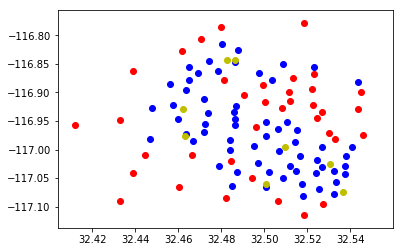

In [7]:
r1 = 600
r1_coverage = np.any(distance < r1, 0)
r1_covered = np.nonzero(r1_coverage)
r1_exposed = np.nonzero(np.logical_not(r1_coverage))

plt.figure()
plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
plt.scatter(bases[:,0],bases[:,1], c='y')
plt.show()

It looks like there is a lot of overlap here. Maybe each time I pick a single base, I will then go into the times and delete the rows that are covered by this base within r1. Then, resort it. Do this 8 times to find the starting set of 8 bases. 

In [8]:
# The largest shortest distance 
print ("Distance: \n", distance)
print ("Min Distance: \n", np.min(distance,0))
np.max(np.min(distance, 0))

Distance: 
 [[ 1340.  1216.  1489.  1589.   819.   833.  1126.  1176.  1545.  1538.
    766.   849.   881.  1097.  1772.  1591.   826.   969.  1049.   988.
    545.   645.  1106.   946.  1245.  1313.   812.   795.   705.   777.
    358.   351.   686.   665.   467.   573.   440.   247.   498.   677.
    691.   682.  1768.  1728.   932.  1297.   809.  1364.  1561.  1475.
    349.   259.  1041.  1141.   747.   575.   925.   448.   441.  1004.
   1138.   718.  1177.  1388.  1370.  1190.   435.  1044.  1029.  1080.
    745.  1388.  1674.   962.  1031.  2247.   636.   565.   496.   895.
   1194.   710.  1385.   770.  1602.  1122.   506.  1100.  1059.  1136.
    687.   365.  1393.   424.  1075.  1571.  1297.  1056.   979.  1056.]
 [  558.   472.   138.   235.  1144.  1004.  1702.  1839.   552.   682.
   1612.  1508.   985.  1128.   847.   756.  1088.  1130.   945.   917.
   1336.  1170.  1328.  1146.   574.   775.  1807.  1803.  2119.  2062.
   1889.  1912.  1458.  1417.  1517.  1505.  1636. 

1120.0

In [9]:
ambulances = np.array([[1/4,1/4,1/4,1/4],[1/3,0,1/3,1/3]]).dot(bases[[0,3,5,7],:]) 
ambulances

array([[  32.5010205 , -117.014544  ],
       [  32.513696  , -117.02739133]])

In [10]:
data = np.array([[9,8,7,6,5], [1,2,3,4,5]])
nums = np.sort(data, axis = 0)
for row in nums:
    for b in data:
        if np.array_equal(row, b):
            print("found")
print(data )
print(nums)


found
found
[[9 8 7 6 5]
 [1 2 3 4 5]]
[[1 2 3 4 5]
 [9 8 7 6 5]]
